In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

In [2]:
URL = 'https://www.flipkart.com/search?q=laptops&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_2_6_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_2_6_na_na_na&as-pos=2&as-type=HISTORY&suggestionId=laptops%7CLaptops&requestId=4f05a4c0-94b5-4c3d-a0f0-6aa701cf94dc&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3DMax'
page = requests.get(URL) # to get all data on the webpage
page.status_code # to see the operatn succesfull

200

In [3]:
page.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.09b0e9.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e82689.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" si

In [4]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.09b0e9.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e82689.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57

In [5]:
name = soup.find('div', class_ = '_4rR01T')
name

<div class="_4rR01T">ZEBRONICS Pro Series Y Intel Core i3 11th Gen 1125G4 - (8 GB/512 GB SSD/Windows 11 Home) ZEB-NBC 1S Th...</div>

In [6]:
name.text

'ZEBRONICS Pro Series Y Intel Core i3 11th Gen 1125G4 - (8 GB/512 GB SSD/Windows 11 Home) ZEB-NBC 1S Th...'

In [7]:
price = soup.find('div', class_='_30jeq3 _1_WHN1')

price

<div class="_30jeq3 _1_WHN1">₹21,990</div>

In [8]:
price.text

'₹21,990'

In [9]:
ratings = soup.find('div', class_='_3LWZlK')

ratings.text

'3.8'

In [10]:
specifications = soup.find('div', class_='fMghEO')

specifications.text

'Intel Core i3 Processor (11th Gen)8 GB LPDDR4X RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 inch) Display1 Year Carry-in Warranty'

In [11]:
specifications

<div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i3 Processor (11th Gen)</li><li class="rgWa7D">8 GB LPDDR4X RAM</li><li class="rgWa7D">Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 inch) Display</li><li class="rgWa7D">1 Year Carry-in Warranty</li></ul></div>

In [12]:
specs = specifications.find('li', class_ = 'rgWa7D')

In [13]:
specs.text

'Intel Core i3 Processor (11th Gen)'

In [14]:
# extracting all products on the webpage
product_details = soup.find_all('div', class_ = '_3pLy-c row')

In [15]:
print('Number of products', len(product_details))

Number of products 24


In [16]:
product_details

[<div class="_3pLy-c row"><div class="col col-7-12"><div class="_2tfzpE"><span>Sponsored</span></div><div class="_4rR01T">ZEBRONICS Pro Series Y Intel Core i3 11th Gen 1125G4 - (8 GB/512 GB SSD/Windows 11 Home) ZEB-NBC 1S Th...</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTCOMGSZ8NUN6B88KU6E0G0Y_COMGSZ8NUN6B88KU_"><div class="_3LWZlK">3.8</div></span><span class="_2_R_DZ"><span><span>55 Ratings </span><span class="_13vcmD">&amp;</span><span> 15 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">Intel Core i3 Processor (11th Gen)</li><li class="rgWa7D">8 GB LPDDR4X RAM</li><li class="rgWa7D">Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 inch) Display</li><li class="rgWa7D">1 Year Carry-in Warranty</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹21,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->

In [17]:
import requests
from bs4 import BeautifulSoup
import time
import numpy as np

titles = []
prices = []
ratings = []
features = []

for x in range(1, 45):
    start_time = time.time()
    
    URL = 'https://www.flipkart.com/search?q=laptops&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=laptops%7CLaptops&requestId=4f05a4c0-94b5-4c3d-a0f0-6aa701cf94dc&as-searchtext=laptop&p%5B%5D=facets.price_range.from%3D20000&p%5B%5D=facets.price_range.to%3DMax&page={}'.format(x)
    page = requests.get(URL)  # to get all data on the webpage
    soup = BeautifulSoup(page.content, 'html.parser')
    
    product_details = soup.find_all('div', class_='_3pLy-c row')
    
    for product in product_details:
    
        name = product.find('div', class_='_4rR01T')
        if name is None:
            titles.append(np.nan)
        else:
            titles.append(name.text)

        price = product.find('div', class_='_30jeq3 _1_WHN1')
        if price is None:
            prices.append(np.nan)
        else:
            prices.append(price.text)

        rating = product.find('div', class_='_3LWZlK')
        if rating is None:
            ratings.append(np.nan)
        else:
            ratings.append(rating.text)

        f = []
        specifications = product.find('div', class_='fMghEO')
        specs = specifications.find_all('li', class_='rgWa7D')
        for feature in specs:
            f.append(feature.text)
        features.append(f)
        
    end_time = time.time()

    print('Page {} completed in {} seconds'.format(x, end_time - start_time))


Page 1 completed in 1.0061349868774414 seconds
Page 2 completed in 0.9205753803253174 seconds
Page 3 completed in 0.9132249355316162 seconds
Page 4 completed in 1.0290775299072266 seconds
Page 5 completed in 1.028233289718628 seconds
Page 6 completed in 0.8191742897033691 seconds
Page 7 completed in 0.9320938587188721 seconds
Page 8 completed in 0.9135174751281738 seconds
Page 9 completed in 0.940026044845581 seconds
Page 10 completed in 0.9129726886749268 seconds
Page 11 completed in 0.9282596111297607 seconds
Page 12 completed in 0.901686429977417 seconds
Page 13 completed in 1.0246930122375488 seconds
Page 14 completed in 1.3098382949829102 seconds
Page 15 completed in 0.8644354343414307 seconds
Page 16 completed in 1.0506222248077393 seconds
Page 17 completed in 0.8704473972320557 seconds
Page 18 completed in 0.9437706470489502 seconds
Page 19 completed in 0.8945877552032471 seconds
Page 20 completed in 1.0366318225860596 seconds
Page 21 completed in 0.8783349990844727 seconds
Page

In [18]:
print(len(titles))
print(len(prices))
print(len(ratings))
print(len(features))

984
984
984
984


In [19]:
print(titles[:5])
print('\n')
print(prices[:5])
print('\n')
print(ratings[:5])
print('\n')
features[:5]

['ZEBRONICS Pro Series Y Intel Core i3 11th Gen 1125G4 - (8 GB/512 GB SSD/Windows 11 Home) ZEB-NBC 1S Th...', 'ZEBRONICS Pro Series Z Intel Core i7 12th Gen 1255U - (16 GB/512 GB SSD/Windows 11 Home) ZEB-NBC 5S Th...', 'Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN93HN/A', 'Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A', 'HP 15s Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin and Light La...']


['₹21,990', '₹37,990', '₹74,990', '₹69,990', '₹36,990']


['3.8', '3.9', '4.7', '4.7', '4.2']




[['Intel Core i3 Processor (11th Gen)',
  '8 GB LPDDR4X RAM',
  'Windows 11 Operating System',
  '512 GB SSD',
  '39.62 cm (15.6 inch) Display',
  '1 Year Carry-in Warranty'],
 ['Intel Core i7 Processor (12th Gen)',
  '16 GB DDR4 RAM',
  'Windows 11 Operating System',
  '512 GB SSD',
  '39.62 cm (15.6 inch) Display',
  '1 Year Carry-in Warranty'],
 ['Apple M1 Processor',
  '8 GB DDR4 RAM',
  'Mac OS Operating System',
  '256 GB SSD',
  '33.78 cm (13.3 inch) Display',
  'Built-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Mail, FaceTime, Messages, Maps, Stocks, Home, Voice Memos, Notes, Calendar, Contacts, Reminders, Photo Booth, Preview, Books, App Store, Time Machine, TV, Music, Podcasts, Find My, QuickTime Player',
  '1 Year Limited Warra\xadnty'],
 ['Apple M1 Processor',
  '8 GB DDR4 RAM',
  'Mac OS Operating System',
  '256 GB SSD',
  '33.78 cm (13.3 inch) Display',
  'Built-in Apps: iMovie, Siri, GarageBand, Pages, Numbers, Photos, Keynote, Safari, Ma

In [20]:
# create a dataframe
data = {'Product_name' : titles,
        'Price'        : prices,
        'Rating'       : ratings,
        'Features'     : features}
df = pd.DataFrame(data)
df.head(10)

,Product_name,Price,Rating,Features
0,ZEBRONICS Pro Series Y Intel Core i3 11th Gen ...,"₹21,990",3.8,"[Intel Core i3 Processor (11th Gen), 8 GB LPDD..."
1,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,"₹37,990",3.9,"[Intel Core i7 Processor (12th Gen), 16 GB DDR..."
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,"₹74,990",4.7,"[Apple M1 Processor, 8 GB DDR4 RAM, Mac OS Ope..."
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,"₹69,990",4.7,"[Apple M1 Processor, 8 GB DDR4 RAM, Mac OS Ope..."
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,"₹36,990",4.2,"[Intel Core i3 Processor (12th Gen), 8 GB DDR4..."
5,HP 2023 AMD Ryzen 3 Dual Core 3250U - (8 GB/51...,"₹28,990",4.2,"[AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RA..."
6,MSI Modern 14 AMD Ryzen 5 Hexa Core 7530U - (1...,"₹34,990",4.3,"[AMD Ryzen 5 Hexa Core Processor, 16 GB DDR4 R..."
7,SAMSUNG Galaxy Book4 Pro Evo Intel Core Ultra ...,"₹1,49,990",NaN,"[Intel Core Ultra 7 Processor, 16 GB LPDDR5X R..."
8,SAMSUNG Galaxy Book2 Pro EVO AMOLED Intel Core...,"₹62,990",4.5,"[Intel Core i5 Processor (12th Gen), 16 GB DDR..."
9,Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...,"₹25,990",4.2,"[AMD Ryzen 3 Quad Core Processor, 8 GB LPDDR5 ..."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  984 non-null    object
 1   Price         984 non-null    object
 2   Rating        697 non-null    object
 3   Features      984 non-null    object
dtypes: object(4)
memory usage: 30.9+ KB


In [22]:
df.to_csv('Flipkart_desktop.csv')

### Data cleaning process

In [23]:
# Converting rating to float
df.Rating = df.Rating.astype(float)

# Converting price to float
df['Price'] = df['Price'].astype(str).apply(lambda s: float(s.replace('₹','').replace(',','')))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  984 non-null    object 
 1   Price         984 non-null    float64
 2   Rating        697 non-null    float64
 3   Features      984 non-null    object 
dtypes: float64(2), object(2)
memory usage: 30.9+ KB


In [24]:
#converting rating to float
df.Rating = df.Rating.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  984 non-null    object 
 1   Price         984 non-null    float64
 2   Rating        697 non-null    float64
 3   Features      984 non-null    object 
dtypes: float64(2), object(2)
memory usage: 30.9+ KB


In [25]:
df.head()

,Product_name,Price,Rating,Features
0,ZEBRONICS Pro Series Y Intel Core i3 11th Gen ...,21990.0,3.8,"[Intel Core i3 Processor (11th Gen), 8 GB LPDD..."
1,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,37990.0,3.9,"[Intel Core i7 Processor (12th Gen), 16 GB DDR..."
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,74990.0,4.7,"[Apple M1 Processor, 8 GB DDR4 RAM, Mac OS Ope..."
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,69990.0,4.7,"[Apple M1 Processor, 8 GB DDR4 RAM, Mac OS Ope..."
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,36990.0,4.2,"[Intel Core i3 Processor (12th Gen), 8 GB DDR4..."


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  984 non-null    object 
 1   Price         984 non-null    float64
 2   Rating        697 non-null    float64
 3   Features      984 non-null    object 
dtypes: float64(2), object(2)
memory usage: 30.9+ KB


In [27]:
# convert the feature in string(to work with regular expressions)
df.Features = df.Features.apply(lambda x: ','.join(x))
df.head()

,Product_name,Price,Rating,Features
0,ZEBRONICS Pro Series Y Intel Core i3 11th Gen ...,21990.0,3.8,"Intel Core i3 Processor (11th Gen),8 GB LPDDR4..."
1,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,37990.0,3.9,"Intel Core i7 Processor (12th Gen),16 GB DDR4 ..."
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,74990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat..."
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,69990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat..."
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,36990.0,4.2,"Intel Core i3 Processor (12th Gen),8 GB DDR4 R..."


In [28]:
# to extract processor
df.Features[0]

'Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Carry-in Warranty'

In [29]:
def get_ram(text): 
    pattern = r'\b\d+\s*GB\s*DDR4\s*RAM\b'

    # Use re.search to find the matching pattern in the text
    match = re.search(pattern, text)

    # Extract the RAM information if match found
    if match:
        ram_info = match.group()
        return ram_info
    else:
        return np.nan
get_ram(df.Features[0])

nan

In [30]:
df['RAM'] = df.Features.apply(get_ram)
df.head()

,Product_name,Price,Rating,Features,RAM
0,ZEBRONICS Pro Series Y Intel Core i3 11th Gen ...,21990.0,3.8,"Intel Core i3 Processor (11th Gen),8 GB LPDDR4...",NaN
1,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,37990.0,3.9,"Intel Core i7 Processor (12th Gen),16 GB DDR4 ...",16 GB DDR4 RAM
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,74990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,69990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,36990.0,4.2,"Intel Core i3 Processor (12th Gen),8 GB DDR4 R...",8 GB DDR4 RAM


In [31]:
df.head()

,Product_name,Price,Rating,Features,RAM
0,ZEBRONICS Pro Series Y Intel Core i3 11th Gen ...,21990.0,3.8,"Intel Core i3 Processor (11th Gen),8 GB LPDDR4...",NaN
1,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,37990.0,3.9,"Intel Core i7 Processor (12th Gen),16 GB DDR4 ...",16 GB DDR4 RAM
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,74990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,69990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,36990.0,4.2,"Intel Core i3 Processor (12th Gen),8 GB DDR4 R...",8 GB DDR4 RAM


In [32]:
df['Features'][0]

'Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Carry-in Warranty'

In [33]:
def get_processor(text): 
    processor_regex = re.compile(r'Processor \([^)]+\)')
    processor = processor_regex.findall(text)
    if len(processor) == 0:
        return np.nan
    else:
        return processor[0]
get_processor(df.Features[0])

'Processor (11th Gen)'

In [34]:
df['Processor'] = df.Features.apply(get_processor)
df.head()

,Product_name,Price,Rating,Features,RAM,Processor
0,ZEBRONICS Pro Series Y Intel Core i3 11th Gen ...,21990.0,3.8,"Intel Core i3 Processor (11th Gen),8 GB LPDDR4...",NaN,Processor (11th Gen)
1,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,37990.0,3.9,"Intel Core i7 Processor (12th Gen),16 GB DDR4 ...",16 GB DDR4 RAM,Processor (12th Gen)
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,74990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,69990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,36990.0,4.2,"Intel Core i3 Processor (12th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (12th Gen)


In [35]:
def get_operating_system(text): 
    os_regex = re.compile(r'Windows \d+ Operating System')
    os_match = os_regex.search(text)
    if os_match:
        return os_match.group()
    else:
        return np.nan
get_operating_system(df.Features[0])

'Windows 11 Operating System'

In [36]:
df['operating system'] = df.Features.apply(get_operating_system)
df.head()

,Product_name,Price,Rating,Features,RAM,Processor,operating system
0,ZEBRONICS Pro Series Y Intel Core i3 11th Gen ...,21990.0,3.8,"Intel Core i3 Processor (11th Gen),8 GB LPDDR4...",NaN,Processor (11th Gen),Windows 11 Operating System
1,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,37990.0,3.9,"Intel Core i7 Processor (12th Gen),16 GB DDR4 ...",16 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,74990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,69990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,36990.0,4.2,"Intel Core i3 Processor (12th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System


In [37]:
df['Features'][0]

'Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Carry-in Warranty'

In [38]:
def get_ssd(text): 
    ssd_regex = re.compile(r'\d+ GB SSD')
    ssd_match = ssd_regex.search(text)
    if ssd_match:
        return ssd_match.group()
    else:
        return np.nan
get_ssd(df.Features[0])

'512 GB SSD'

In [39]:
df['SSD'] = df.Features.apply(get_ssd)
df.head()

,Product_name,Price,Rating,Features,RAM,Processor,operating system,SSD
0,ZEBRONICS Pro Series Y Intel Core i3 11th Gen ...,21990.0,3.8,"Intel Core i3 Processor (11th Gen),8 GB LPDDR4...",NaN,Processor (11th Gen),Windows 11 Operating System,512 GB SSD
1,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,37990.0,3.9,"Intel Core i7 Processor (12th Gen),16 GB DDR4 ...",16 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System,512 GB SSD
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,74990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN,256 GB SSD
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,69990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN,256 GB SSD
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,36990.0,4.2,"Intel Core i3 Processor (12th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System,512 GB SSD


In [40]:
df['Features'][0]

'Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Carry-in Warranty'

In [41]:
def get_display(text):
    regex = re.compile(r'\((.*?)\) ([A-Za-z0-9\s\+]+) Display')
    display_match = regex.search(text)

    if display_match:
        display_info = display_match.group(0)
        return display_info.replace("'", "").replace('"', '')  
    else:
        return np.nan
get_display(df.Features[0])

nan

In [42]:
df['Display'] = df.Features.apply(get_display)

In [43]:
df.head()

,Product_name,Price,Rating,Features,RAM,Processor,operating system,SSD,Display
0,ZEBRONICS Pro Series Y Intel Core i3 11th Gen ...,21990.0,3.8,"Intel Core i3 Processor (11th Gen),8 GB LPDDR4...",NaN,Processor (11th Gen),Windows 11 Operating System,512 GB SSD,NaN
1,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,37990.0,3.9,"Intel Core i7 Processor (12th Gen),16 GB DDR4 ...",16 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System,512 GB SSD,NaN
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,74990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN,256 GB SSD,NaN
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,69990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN,256 GB SSD,NaN
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,36990.0,4.2,"Intel Core i3 Processor (12th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System,512 GB SSD,NaN


In [44]:
df['Features'][0]

'Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Carry-in Warranty'

In [45]:
def get_warranty(text): 
    warranty_regex = re.compile(r'\d+ Year ([A-Za-z0-9\s\+]+) Warranty')
    warranty_match = warranty_regex.search(text)
    if warranty_match:
        return warranty_match.group()
    else:
        return np.nan
get_warranty(df.Features[0])

nan

In [46]:
df['Warranty'] = df.Features.apply(get_warranty)

In [47]:
df.head()

,Product_name,Price,Rating,Features,RAM,Processor,operating system,SSD,Display,Warranty
0,ZEBRONICS Pro Series Y Intel Core i3 11th Gen ...,21990.0,3.8,"Intel Core i3 Processor (11th Gen),8 GB LPDDR4...",NaN,Processor (11th Gen),Windows 11 Operating System,512 GB SSD,NaN,NaN
1,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,37990.0,3.9,"Intel Core i7 Processor (12th Gen),16 GB DDR4 ...",16 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System,512 GB SSD,NaN,NaN
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,74990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN,256 GB SSD,NaN,NaN
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,69990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,NaN,NaN,256 GB SSD,NaN,NaN
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,36990.0,4.2,"Intel Core i3 Processor (12th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System,512 GB SSD,NaN,1 Year Onsite Warranty


In [48]:
df.to_csv('Flipkart_desktops.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_name      984 non-null    object 
 1   Price             984 non-null    float64
 2   Rating            697 non-null    float64
 3   Features          984 non-null    object 
 4   RAM               483 non-null    object 
 5   Processor         568 non-null    object 
 6   operating system  925 non-null    object 
 7   SSD               783 non-null    object 
 8   Display           226 non-null    object 
 9   Warranty          622 non-null    object 
dtypes: float64(2), object(8)
memory usage: 77.0+ KB


In [50]:
df['Display']

0                                NaN
1                                NaN
2                                NaN
3                                NaN
4                                NaN
                   ...              
979                              NaN
980                              NaN
981    (14 inch) Touchscreen Display
982                              NaN
983                              NaN
Name: Display, Length: 984, dtype: object

In [51]:
df = df.drop('Display', axis=1)

In [52]:
df.columns

Index(['Product_name', 'Price', 'Rating', 'Features', 'RAM', 'Processor',
       'operating system', 'SSD', 'Warranty'],
      dtype='object')

In [54]:
df.Price.replace(np.nan, df.Price.mean().round(1), inplace = True)
df.Rating.replace(np.nan, df.Rating.mean().round(1), inplace = True)
df.RAM.replace(np.nan, df.RAM.mode()[0], inplace = True)
df.Warranty.replace(np.nan, df.Warranty.mode()[0], inplace = True)
df.SSD.replace(np.nan, df.SSD.mode()[0], inplace = True)
df.Processor.replace(np.nan, df.Processor.mode()[0], inplace = True)
df['operating system'].replace(np.nan, df['operating system'].mode()[0], inplace = True)


In [55]:
df.head()

,Product_name,Price,Rating,Features,RAM,Processor,operating system,SSD,Warranty
0,ZEBRONICS Pro Series Y Intel Core i3 11th Gen ...,21990.0,3.8,"Intel Core i3 Processor (11th Gen),8 GB LPDDR4...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty
1,ZEBRONICS Pro Series Z Intel Core i7 12th Gen ...,37990.0,3.9,"Intel Core i7 Processor (12th Gen),16 GB DDR4 ...",16 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty
2,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,74990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System,256 GB SSD,1 Year Onsite Warranty
3,Apple 2020 Macbook Air Apple M1 - (8 GB/256 GB...,69990.0,4.7,"Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operat...",8 GB DDR4 RAM,Processor (11th Gen),Windows 11 Operating System,256 GB SSD,1 Year Onsite Warranty
4,HP 15s Intel Core i3 12th Gen 1215U - (8 GB/51...,36990.0,4.2,"Intel Core i3 Processor (12th Gen),8 GB DDR4 R...",8 GB DDR4 RAM,Processor (12th Gen),Windows 11 Operating System,512 GB SSD,1 Year Onsite Warranty


In [56]:
df.describe()

,Price,Rating
count,984.000000,984.000000
mean,74859.180894,4.127541
std,54657.818940,0.258888
min,20800.000000,1.700000
25%,34990.000000,4.100000
50%,51990.000000,4.100000
75%,103915.000000,4.300000
max,449990.000000,5.000000


C:\Users\DX\AppData\Local\Temp\ipykernel_15060\2164191112.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


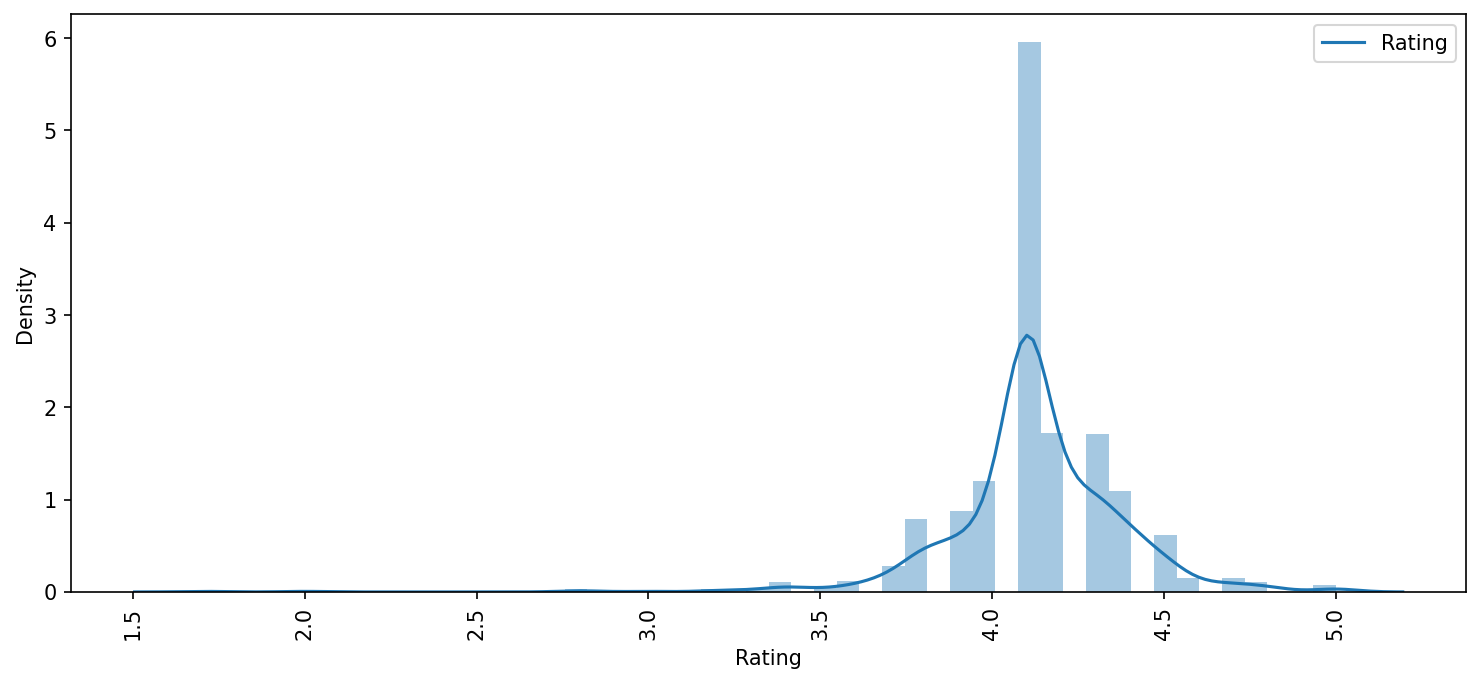

In [70]:
plt.figure(figsize=(12, 5), dpi=150)
sns.distplot(df['Rating'])  
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(['Rating'], loc='best')  # Add legend to the plot with the label 'Rating'
plt.show()

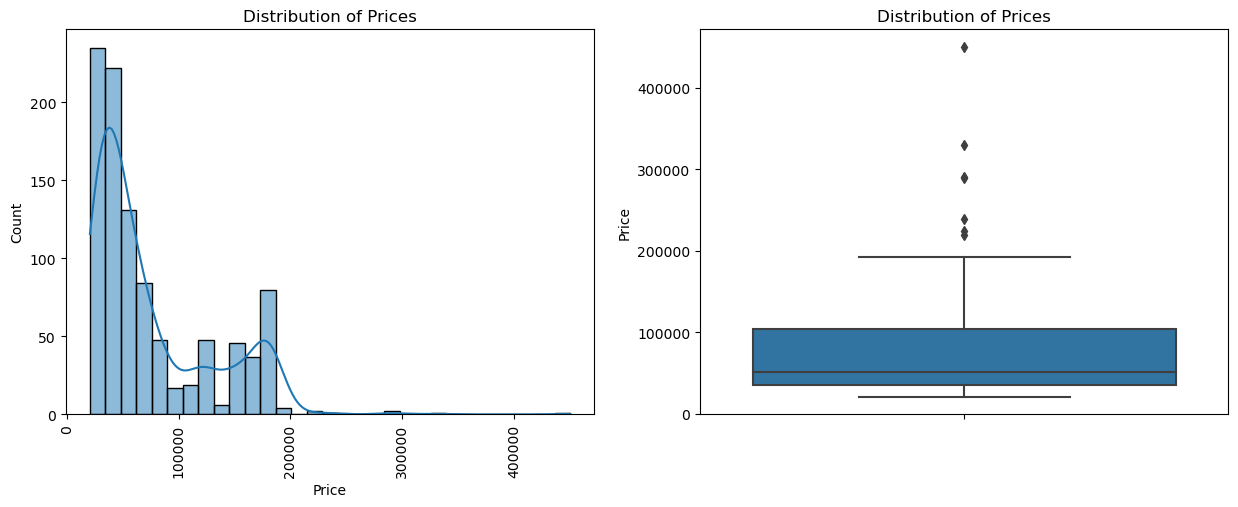

In [71]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Prices')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Price'])
plt.title('Distribution of Prices')
plt.xticks(rotation=90)
plt.show()


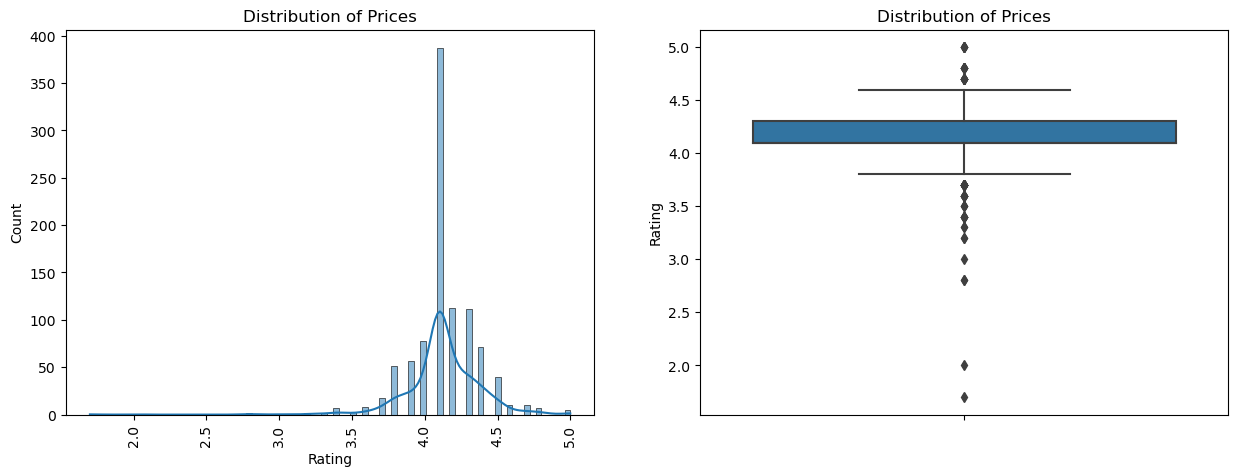

In [72]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], kde=True)
plt.title('Distribution of Prices')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Rating'])
plt.title('Distribution of Prices')
plt.xticks(rotation=90)
plt.show()


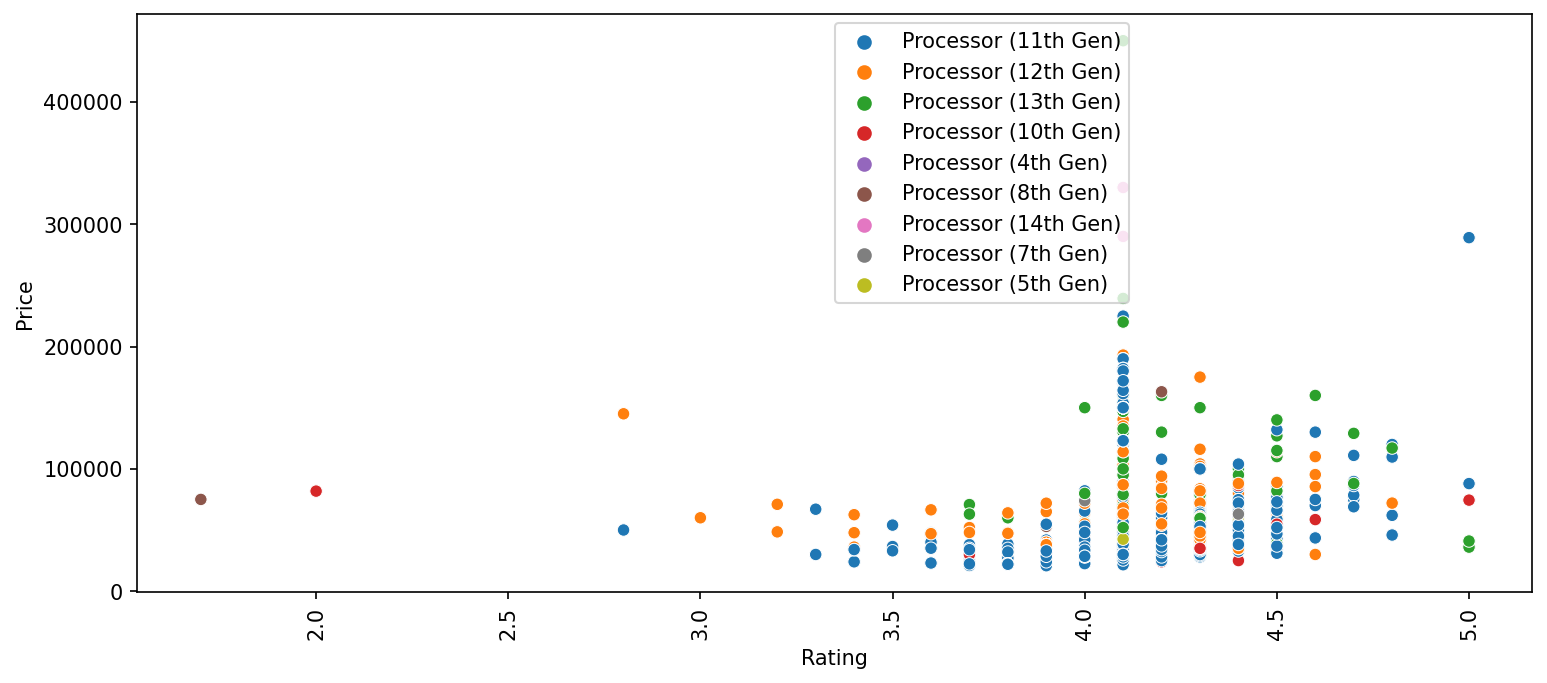

In [67]:
plt.figure(figsize=(12, 5), dpi=150)
sns.scatterplot(x='Rating', y='Price', data=df, hue='Processor')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(loc=(0.5,.5))  # Add legend to the plot
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Processor (11th Gen)'),
  Text(1, 0, 'Processor (12th Gen)'),
  Text(2, 0, 'Processor (13th Gen)'),
  Text(3, 0, 'Processor (10th Gen)'),
  Text(4, 0, 'Processor (4th Gen)'),
  Text(5, 0, 'Processor (8th Gen)'),
  Text(6, 0, 'Processor (14th Gen)'),
  Text(7, 0, 'Processor (7th Gen)'),
  Text(8, 0, 'Processor (5th Gen)')])

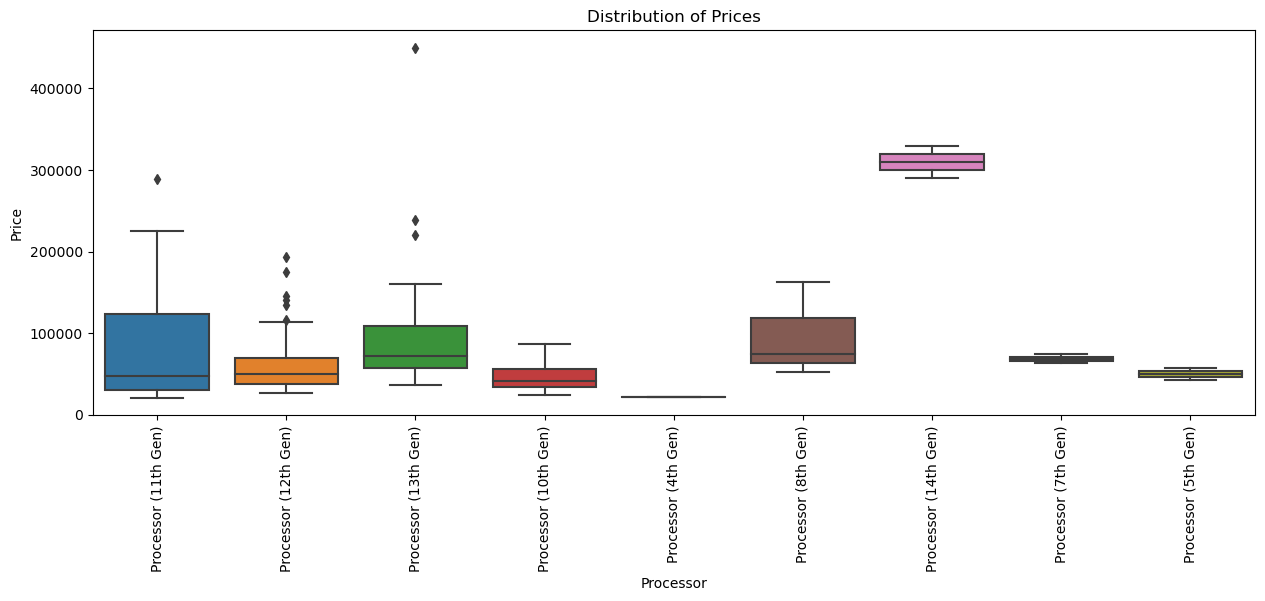

In [82]:
plt.figure(figsize=(15, 5))

sns.boxplot(y=df['Price'], x=df['Processor'])
plt.title('Distribution of Prices')
plt.xticks(rotation=90)


(array([0, 1, 2, 3]),
 [Text(0, 0, '8 GB DDR4 RAM'),
  Text(1, 0, '16 GB DDR4 RAM'),
  Text(2, 0, '4 GB DDR4 RAM'),
  Text(3, 0, '32 GB DDR4 RAM')])

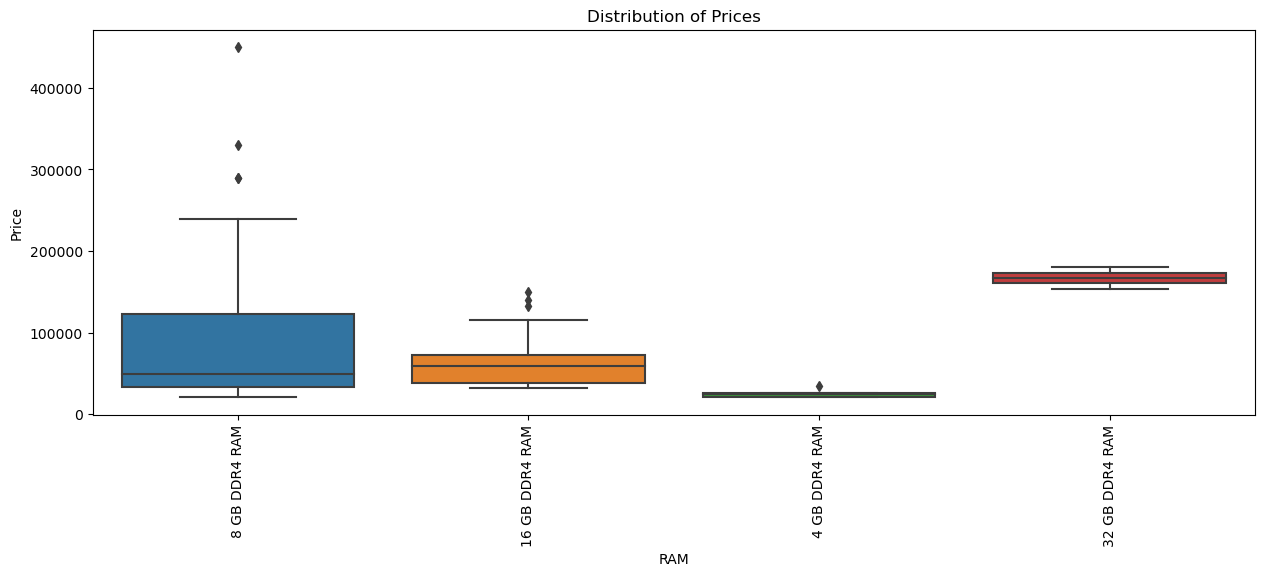

In [84]:
plt.figure(figsize=(15, 5))

sns.boxplot(y=df['Price'], x=df['RAM'])
plt.title('Distribution of Prices')
plt.xticks(rotation=90)


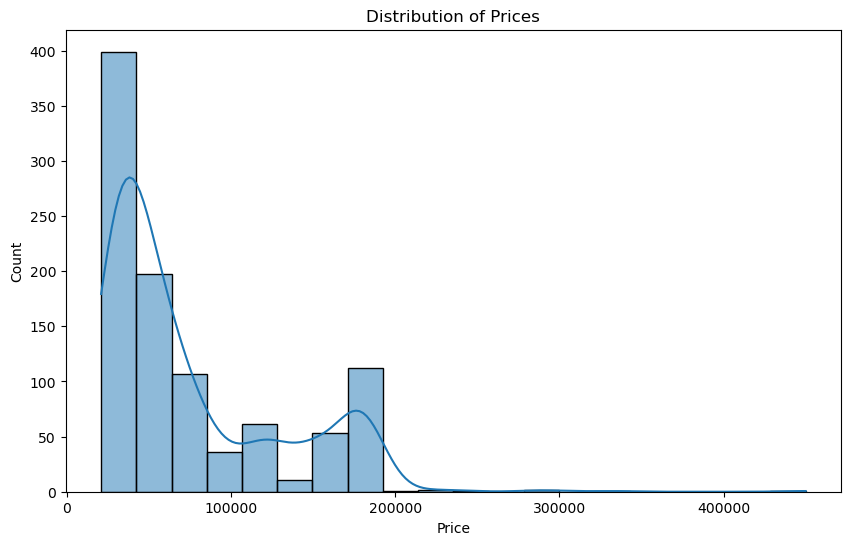

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.show()

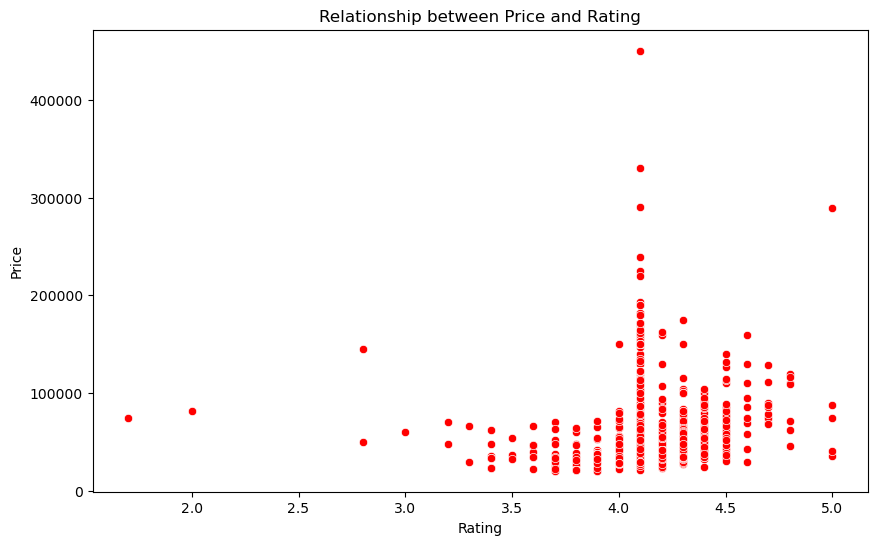

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Price', data=df, color='Red')
plt.title('Relationship between Price and Rating')
plt.show()

In [76]:
df.columns

Index(['Product_name', 'Price', 'Rating', 'Features', 'RAM', 'Processor',
       'operating system', 'SSD', 'Warranty'],
      dtype='object')

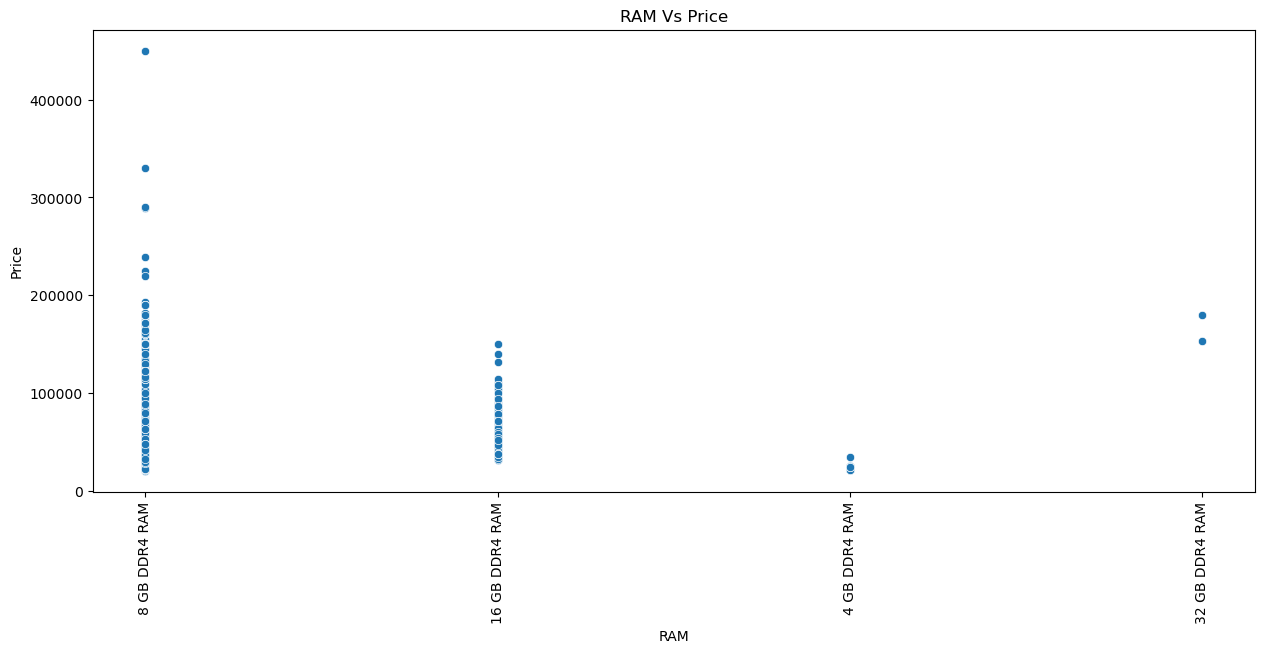

In [79]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='RAM', y='Price', data=df)
plt.title('RAM Vs Price')
plt.xticks(rotation=90)
plt.show()

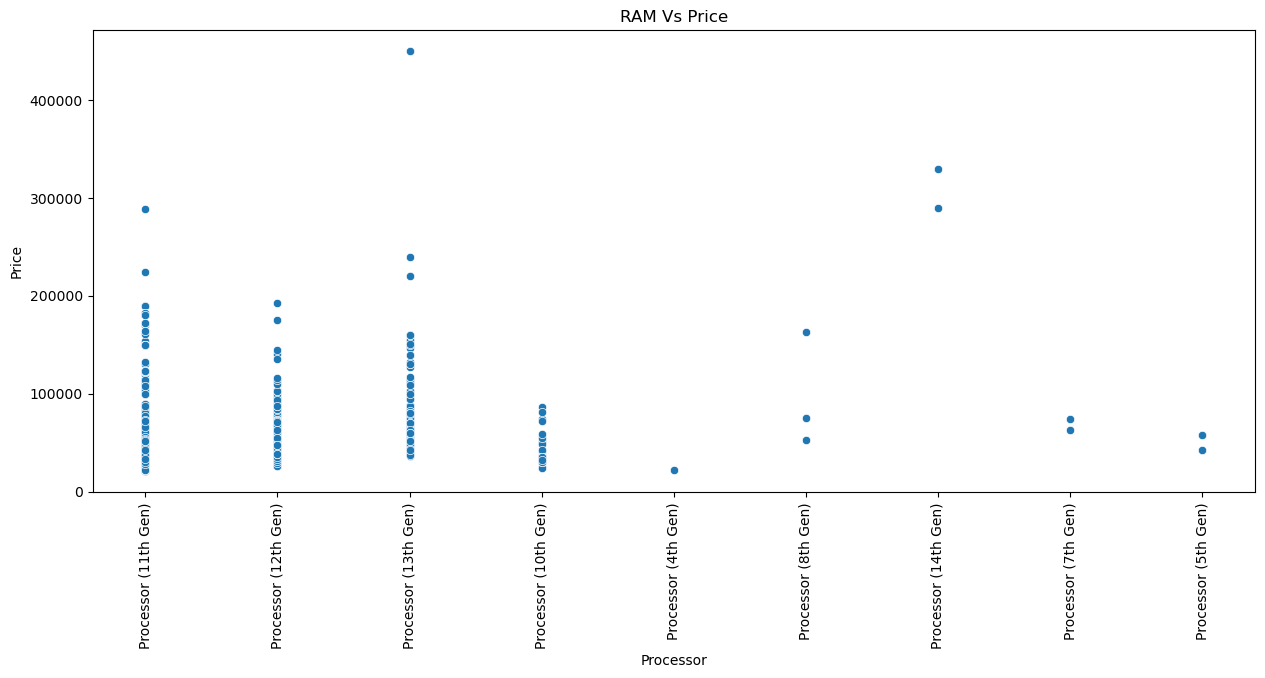

In [83]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Processor', y='Price', data=df)
plt.title('RAM Vs Price')
plt.xticks(rotation=90)
plt.show()

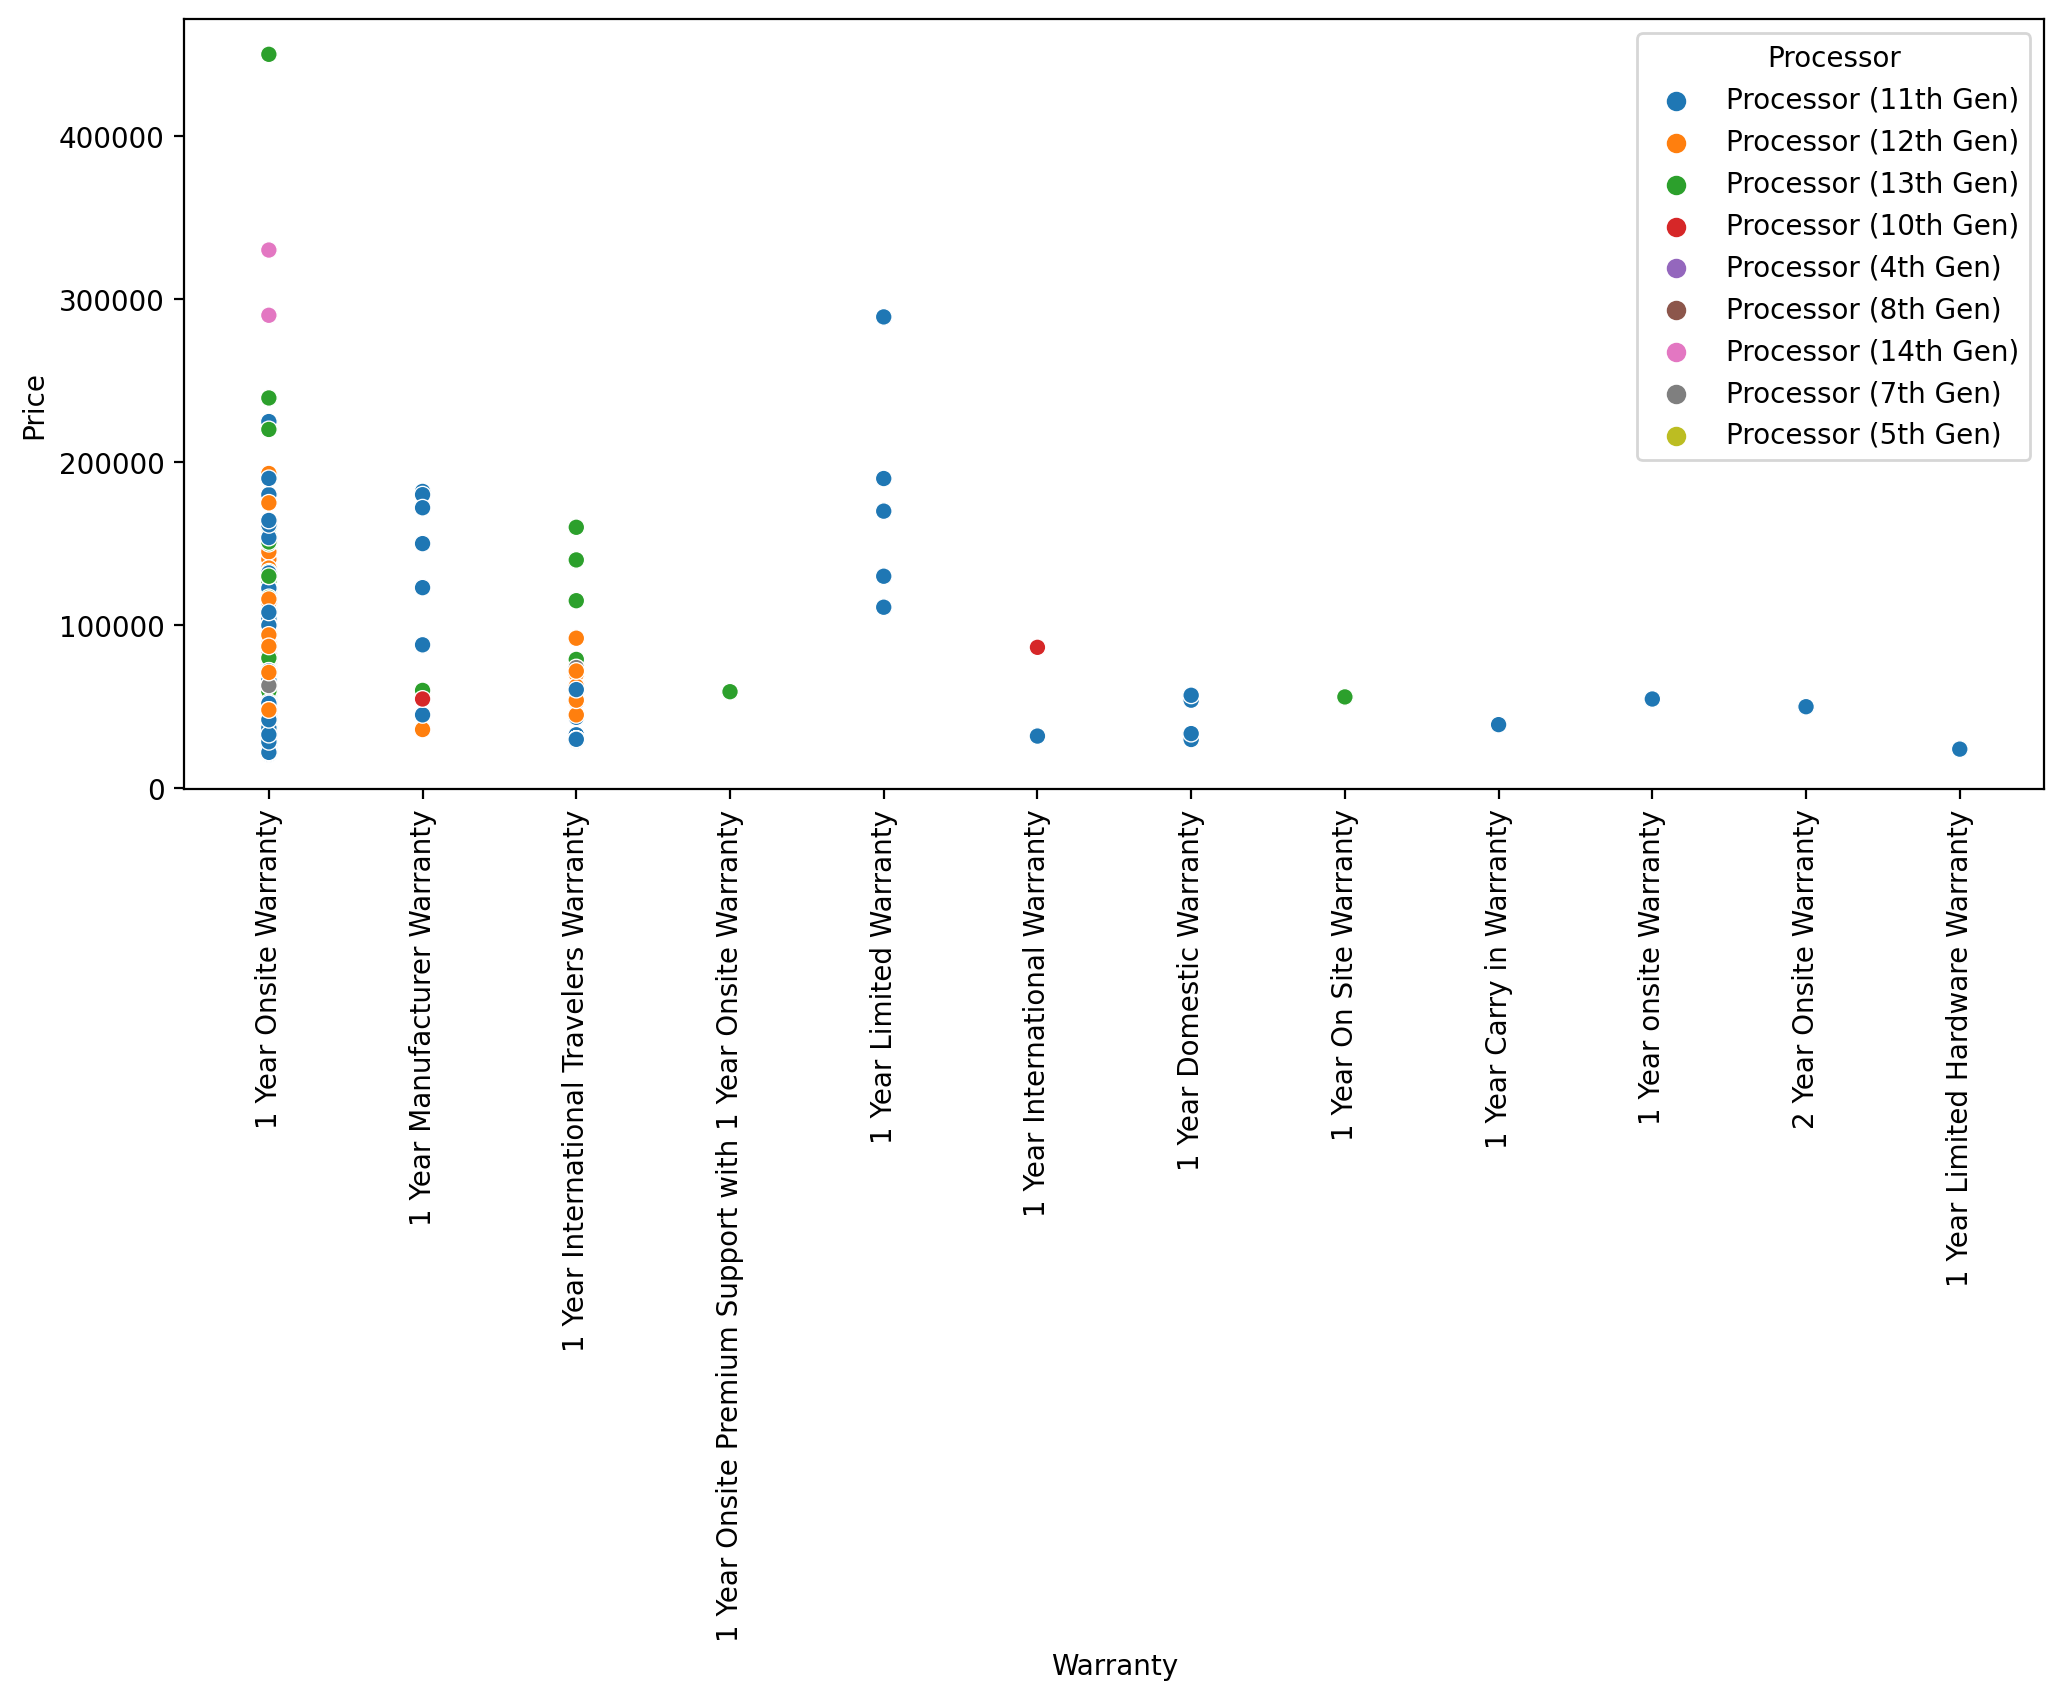

In [86]:
plt.figure(figsize =(12,5), dpi = 200)
sns.scatterplot(y='Price', x=df['Warranty'], data=df, hue=df['Processor'])
plt.xticks(rotation=90)
plt.show()

In [88]:
df.columns

Index(['Product_name', 'Price', 'Rating', 'Features', 'RAM', 'Processor',
       'operating system', 'SSD', 'Warranty'],
      dtype='object')

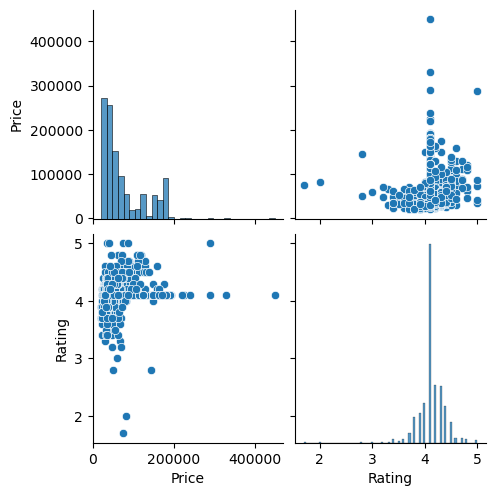

In [91]:
numerical_columns = ['Price', 'Rating']

# Creating a pairplot
sns.pairplot(df[numerical_columns])
plt.show()

In [90]:
df.corr()

C:\Users\DX\AppData\Local\Temp\ipykernel_15060\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Rating
Price,1.000000,0.096787
Rating,0.096787,1.000000


C:\Users\DX\AppData\Local\Temp\ipykernel_15060\874485724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


<Axes: >

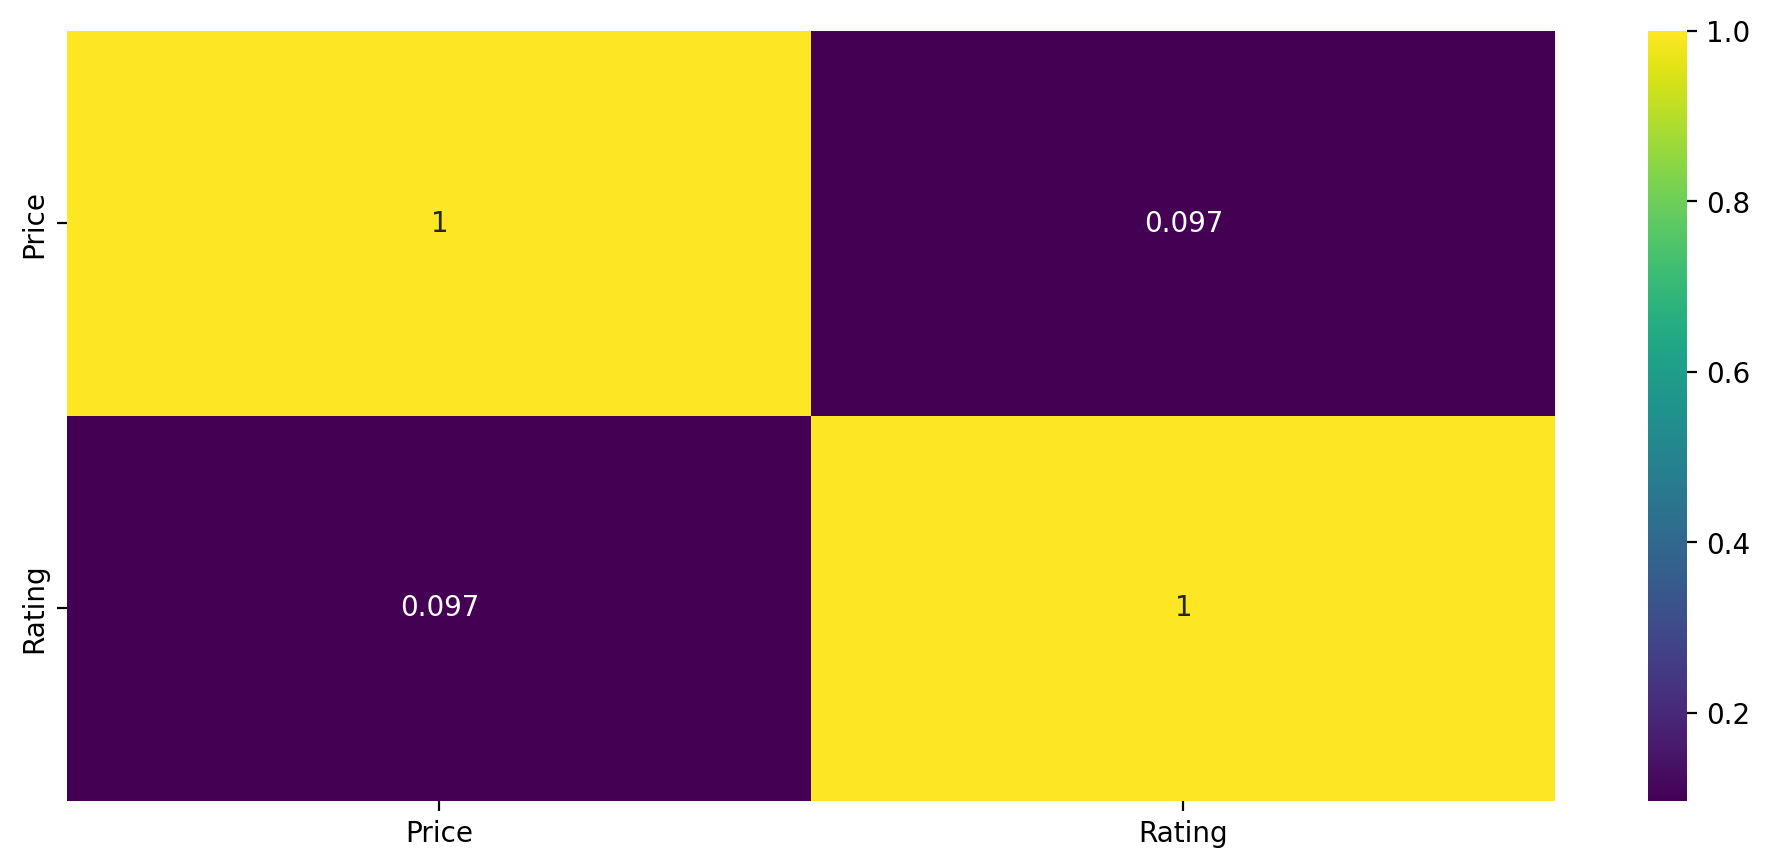

In [92]:
plt.figure(figsize =(12,5), dpi =200)
sns.heatmap(df.corr(), annot=True, cmap='viridis')